In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils.vis_utils import plot_model
import cv2
import numpy as np
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from time import time
import tensorflow as tf



# create a dictionary and loop the imagefiles into it
dictionary = {}
for path, subdirs, files in os.walk("C:\\Users\\Fola\\Documents\\Masters\\20COP508 - Machine Learning\\Assignment\\natural_images"):
  for dir in subdirs:
    dummy = []
    for file in os.listdir(os.path.join(path, dir)):
      img = cv2.imread(os.path.join(path, dir, file), cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (32,32))
      img_asArray = np.array(img)
      dummy.append(img_asArray)
    dictionary[dir] = np.array(dummy)
    
# create X and Y datasets
X = np.concatenate((dictionary['airplane'], dictionary['car'], dictionary['cat'], dictionary['dog'], dictionary['flower'], dictionary['fruit'], dictionary['motorbike'], dictionary['person']))
Y = ['airplane' for i in range(len(dictionary['airplane']))]
Y.extend(['car' for i in range(len(dictionary['car']))])
Y.extend(['cat' for i in range(len(dictionary['cat']))])
Y.extend(['dog' for i in range(len(dictionary['dog']))])
Y.extend(['flower' for i in range(len(dictionary['flower']))])
Y.extend(['fruit' for i in range(len(dictionary['fruit']))])
Y.extend(['motorbike' for i in range(len(dictionary['motorbike']))])
Y.extend(['person' for i in range(len(dictionary['person']))])

# normalize data
X = X/255

X = X.reshape(-1, 32, 32, 1)
Y = LabelBinarizer().fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)


batch_size = 128
num_classes = 8
epochs = 20
input_shape = (32, 32, 1, )


# Model Building
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# Visualisation of the model
keras.utils.plot_model(model, 'model.png')

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# Start loop for training time
start = time()  
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# End loop for training time
end = time()
print('Total training time {} seconds'.format(end - start))


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/20
44/44 [==============================] - 3s 53ms/step - loss: 1.7792 - accuracy: 0.3684 - val_loss: 0.9612 - val_accuracy: 0.6500
Epoch 2/20
44/44 [==============================] - 2s 38ms/step - loss: 0.8828 - accuracy: 0.6880 - val_loss: 0.7130 - val_accuracy: 0.7406
Epoch 3/20
44/44 [==============================] - 2s 38ms/step - loss: 0.7102 - accuracy: 0.7449 - val_loss: 0.6175 - val_accuracy: 0.7587
Epoch 4/20
44/44 [==============================] - 2s 37ms/step - loss: 0.6017 - accuracy: 0.7813 - val_loss: 0.6011 - val_accuracy: 0.7812
Epoch 5/20
44/44 [==============================] - 2s 38ms/step - loss: 0.5439 - accuracy: 0.7962 - val_loss: 0.5799 - val_accuracy: 0.7732
Epoch 6/20
44/44 [==============================] - 2s 37ms/step - loss: 0.5142 - accuracy: 0.8097 - val_loss: 0.5192 - val_accuracy: 0.7986
Epoch 

In [2]:
# Confusion Matrix 
my_preds = model.predict(x_test).argmax(axis=1)
my_labels=np.argmax(y_test, axis=1)
cm = confusion_matrix(my_labels, my_preds)
print(cm)

[[123   2   4   3   1   0   0   0]
 [  0 181   5   3   9   0   0   0]
 [  1   2 137  13  24   1   0   1]
 [  0   2  47  57  31   1   0   1]
 [  2   0  20  11 141   3   0   1]
 [  3   0   0   0   0 204   0   0]
 [  0   0   0   0  15   0 144   0]
 [  0   0   1   1   0   0   0 185]]


20


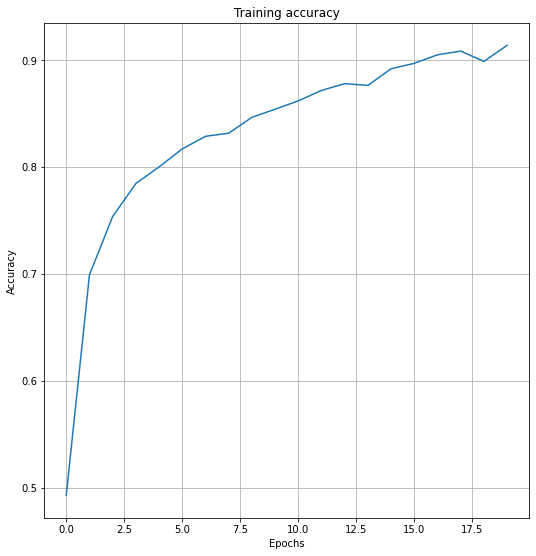

In [3]:
# Training accuracy Graph
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,figsize=(8,8))
fig.tight_layout(pad=3.0)
ax.plot(history.history['accuracy'])
ax.set_title('Training accuracy')
ax.grid()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
print(len(history.history['accuracy']))


Text(45.0, 0.5, 'Loss')

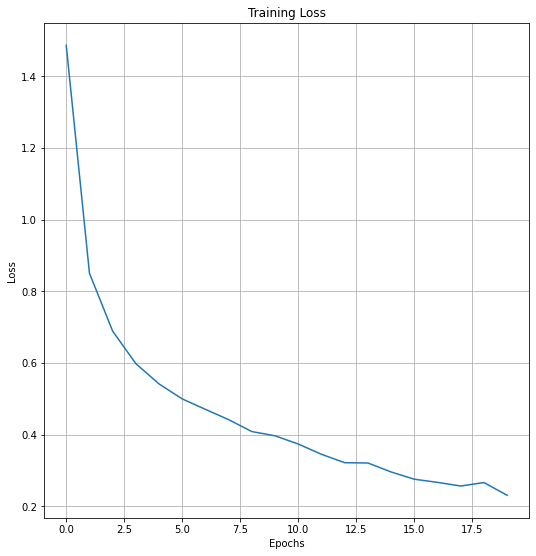

In [4]:
# Training Loss Graph
fig,ax=plt.subplots(1,figsize=(8,8))
fig.tight_layout(pad=3.0)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")


In [5]:
# Wilcoxon Ranks Test
from scipy.stats import wilcoxon

results_without_dropout = [0.865,0.852,0.860,0.846,0.860,0.883,0.855,0.843,0.839,0.850,0.857,0.857,0.871,0.844,0.858,0.867,0.863,0.866,0.872,0.853]

results_with_dropout = [0.871,0.863,0.865,0.865,0.863,0.875,0.854,0.872,0.868,0.871,0.858,0.852,0.867,0.838,0.855,0.870,0.868,0.886,0.863,0.877]

w,p = wilcoxon(results_with_dropout, results_without_dropout)
print(p)

0.06372261047363281


In [6]:
loss_results_without_dropout = [0.541,0.571,0.592,0.659,0.541,0.515,0.606,0.647,0.702,0.603,0.603,0.473,0.505,0.631,0.595,0.554,0.592,0.567,0.483,0.612]

loss_results_with_dropout = [0.497, 0.519, 0.435, 0.531, 0.485, 0.440, 0.535, 0.495, 0.489, 0.486, 0.512, 0.532, 0.461, 0.544, 0.482, 0.460, 0.526, 0.443, 0.452, 0.423] 

w,p = wilcoxon(loss_results_without_dropout, loss_results_with_dropout)
print(p)

2.6702880859375e-05


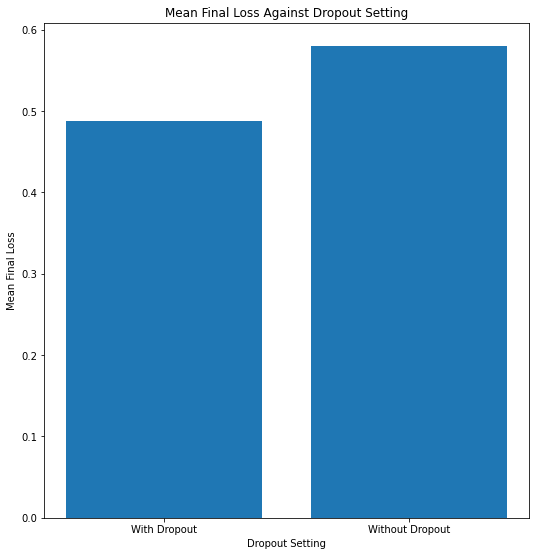

In [7]:
mean_with_dropout = sum(loss_results_with_dropout)/len(loss_results_with_dropout)
mean_without_dropout = sum(loss_results_without_dropout)/len(loss_results_without_dropout)
fig2,ax2 = plt.subplots(1, figsize=(8,8))
fig2.tight_layout(pad=3.0)
ax2.bar([1, 2], [mean_with_dropout, mean_without_dropout])
ax2.set_title("Mean Final Loss Against Dropout Setting")
ax2.set_xlabel("Dropout Setting")
ax2.set_ylabel("Mean Final Loss")
ax2.set_xticklabels(["With Dropout", "Without Dropout"])
ax2.set_xticks([1,2])
plt.show()

In [8]:
print(mean_with_dropout - mean_without_dropout)

-0.09225000000000011
